In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import sklearn
import seaborn as sns
import datetime

In [163]:
#Reading in the datasets
play = pd.read_csv('fifa_cleaned.csv')
play.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [164]:
#Describing the dataset
play.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,215411.087780,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,29758.387106,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,16.000000,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201117.250000,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,222919.000000,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,237613.500000,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,247607.000000,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


In [165]:
#group by nationality
grouped_players = play.groupby(['nationality'])
print(grouped_players)

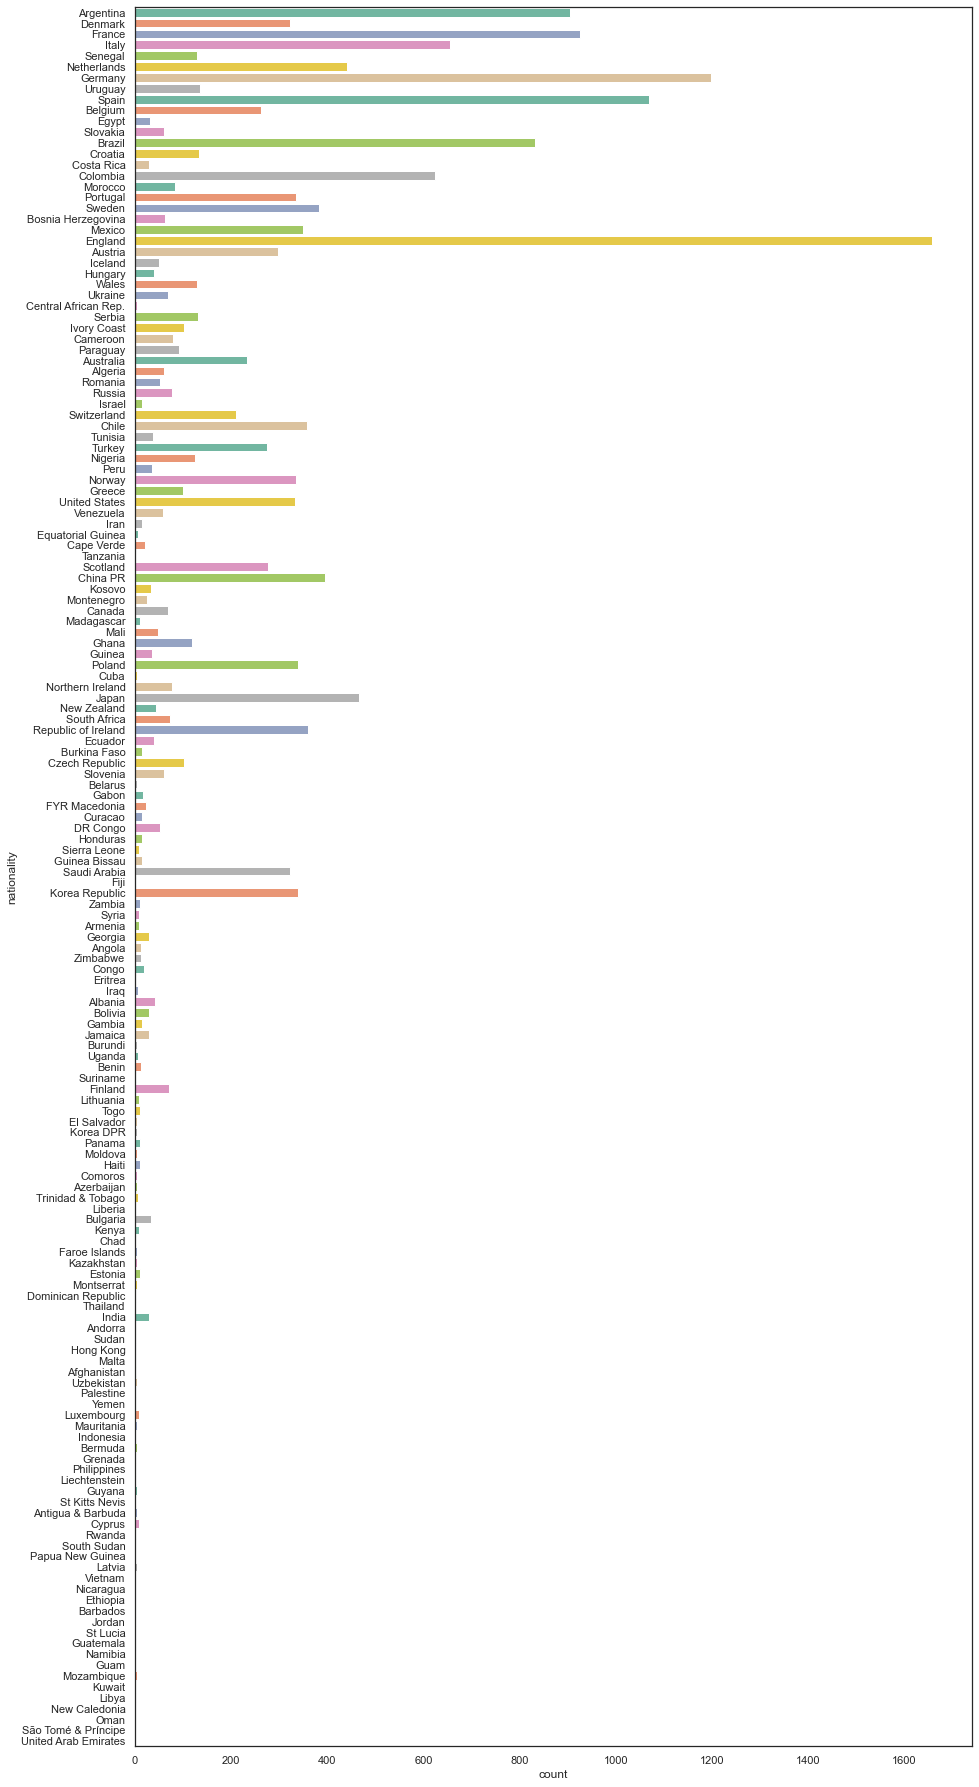

In [166]:
 #Plot all the nations on Y Axis; Graph of number of players as per their nationality
plt.figure(figsize=(15,32))
 
sns.countplot(y = play.nationality,palette="Set2")
#Top 5 countries with maximum players- England, Germany, Spain, France and Argentina

In [167]:
#Selecting one nationality players
df_france = play.loc[play['nationality']=='France']
df_france = df_france.fillna(0)
df_france


,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
6,231747,K. Mbappé,Kylian Mbappé,1998-12-20,20,152.40,73.0,"RW,ST,RM",France,88,...,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3
13,194765,A. Griezmann,Antoine Griezmann,1991-03-21,27,175.26,73.0,"CF,ST",France,89,...,72+3,70+3,70+3,70+3,72+3,70+3,65+3,65+3,65+3,70+3
35,211300,A. Martial,Anthony Martial,1995-12-05,23,182.88,76.2,"LW,ST,LM",France,84,...,64+3,60+3,60+3,60+3,64+3,61+3,54+3,54+3,54+3,61+3
41,216594,N. Fekir,Nabil Fekir,1993-07-18,25,172.72,74.8,CAM,France,84,...,62+3,60+3,60+3,60+3,62+3,56+3,50+3,50+3,50+3,56+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17900,165153,K. Benzema,Karim Benzema,1987-12-19,31,185.42,81.2,ST,France,86,...,60+3,59+3,59+3,59+3,60+3,56+3,52+3,52+3,52+3,56+3
17909,201535,R. Varane,Raphaël Varane,1993-04-25,25,190.50,81.2,CB,France,86,...,75+3,79+3,79+3,79+3,75+3,78+3,83+3,83+3,83+3,78+3
17917,205600,S. Umtiti,Samuel Umtiti,1993-11-14,25,182.88,74.8,CB,France,87,...,80+3,81+3,81+3,81+3,80+3,81+3,84+3,84+3,84+3,81+3
17923,167948,H. Lloris,Hugo Lloris,1986-12-26,32,187.96,82.1,GK,France,88,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df_france.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,9.250000e+02,925.000000,925.000000,925.000000,...,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,215131.951351,25.008649,175.229795,75.494054,67.856216,73.742703,3.775054e+06,14076.756757,1.200000,2.917838,...,49.874595,60.881081,47.927568,49.796757,47.794595,16.686486,16.482162,16.390270,16.593514,16.836757
std,31029.471977,4.796049,14.090401,6.949664,7.010496,6.448830,7.979989e+06,27168.775652,0.505382,0.623976,...,16.139256,10.991975,21.526239,23.179466,22.661947,18.349690,17.526200,16.885216,17.517992,18.397380
min,3665.000000,17.000000,152.400000,54.900000,50.000000,58.000000,0.000000e+00,1000.000000,1.000000,1.000000,...,10.000000,22.000000,5.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,199537.000000,21.000000,154.940000,69.900000,63.000000,69.000000,4.250000e+05,2000.000000,1.000000,3.000000,...,41.000000,54.000000,29.000000,26.000000,23.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,223570.000000,25.000000,182.880000,74.800000,68.000000,73.000000,8.750000e+05,4000.000000,1.000000,3.000000,...,51.000000,61.000000,54.000000,60.000000,57.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,239134.000000,29.000000,185.420000,79.800000,73.000000,78.000000,3.400000e+06,15000.000000,1.000000,3.000000,...,62.000000,68.000000,66.000000,69.000000,66.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,247600.000000,42.000000,200.660000,98.000000,89.000000,95.000000,8.100000e+07,265000.000000,4.000000,5.000000,...,90.000000,89.000000,90.000000,91.000000,88.000000,88.000000,84.000000,79.000000,85.000000,92.000000


In [169]:
#Converting all numeric values to int from type string
fix_cols = ['acceleration','aggression', 'agility', 'balance', 'ball_control', 'composure',
    'crossing', 'curve', 'dribbling', 'finishing', 'freekick_accuracy',
    'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning',
    'GK_reflexes', 'heading_accuracy', 'interceptions', 'jumping',
    'long_passing', 'long_shots', 'marking', 'penalties', 'positioning',
    'reactions', 'short_passing', 'shot_power', 'sliding_tackle',
    'sprint_speed', 'stamina', 'standing_tackle', 'strength', 'vision',
    'volleys']

In [170]:
for col in fix_cols:
    
    df_france[col] = df_france[col].apply(lambda x : eval(str(x)))
    
df_france

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
6,231747,K. Mbappé,Kylian Mbappé,1998-12-20,20,152.40,73.0,"RW,ST,RM",France,88,...,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3
13,194765,A. Griezmann,Antoine Griezmann,1991-03-21,27,175.26,73.0,"CF,ST",France,89,...,72+3,70+3,70+3,70+3,72+3,70+3,65+3,65+3,65+3,70+3
35,211300,A. Martial,Anthony Martial,1995-12-05,23,182.88,76.2,"LW,ST,LM",France,84,...,64+3,60+3,60+3,60+3,64+3,61+3,54+3,54+3,54+3,61+3
41,216594,N. Fekir,Nabil Fekir,1993-07-18,25,172.72,74.8,CAM,France,84,...,62+3,60+3,60+3,60+3,62+3,56+3,50+3,50+3,50+3,56+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17900,165153,K. Benzema,Karim Benzema,1987-12-19,31,185.42,81.2,ST,France,86,...,60+3,59+3,59+3,59+3,60+3,56+3,52+3,52+3,52+3,56+3
17909,201535,R. Varane,Raphaël Varane,1993-04-25,25,190.50,81.2,CB,France,86,...,75+3,79+3,79+3,79+3,75+3,78+3,83+3,83+3,83+3,78+3
17917,205600,S. Umtiti,Samuel Umtiti,1993-11-14,25,182.88,74.8,CB,France,87,...,80+3,81+3,81+3,81+3,80+3,81+3,84+3,84+3,84+3,81+3
17923,167948,H. Lloris,Hugo Lloris,1986-12-26,32,187.96,82.1,GK,France,88,...,0,0,0,0,0,0,0,0,0,0


In [171]:
#Extracting numeric columns from the dataset
df_france.describe().columns

Index(['id', 'age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'release_clause_euro',
       'club_rating', 'club_jersey_number', 'national_rating',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes'],
      dtype='object')

In [172]:
df_france = df_france[['name','id', 'age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'release_clause_euro',
       'club_rating', 'club_jersey_number', 'national_rating',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes']]

In [173]:
df_france.head()

,name,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
2,P. Pogba,195864,25,190.50,83.9,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,5,6,2,4,3
6,K. Mbappé,231747,20,152.40,73.0,88,95,81000000.0,100000.0,3,...,70,86,34,34,32,13,5,7,11,6
13,A. Griezmann,194765,27,175.26,73.0,89,90,78000000.0,145000.0,4,...,83,89,59,54,48,14,8,14,13,14
35,A. Martial,211300,23,182.88,76.2,84,90,42500000.0,165000.0,3,...,81,82,34,39,36,9,8,8,15,11
41,N. Fekir,216594,25,172.72,74.8,84,88,40500000.0,84000.0,3,...,76,89,31,37,25,15,9,8,14,15


In [174]:
#Selecting players with an overall score above 80
df_france = df_france[df_france.overall_rating > 80] 

In [175]:
#Create a separate column for names
player_names= names = df_france.name.tolist() # saving names for later

df_france = df_france.drop(['name'], axis = 1) # drop the name column so that the dataframe consists of only numeric values
df_france.head()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
2,195864,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,...,82,87,63,67,67,5,6,2,4,3
6,231747,20,152.40,73.0,88,95,81000000.0,100000.0,3,4,...,70,86,34,34,32,13,5,7,11,6
13,194765,27,175.26,73.0,89,90,78000000.0,145000.0,4,3,...,83,89,59,54,48,14,8,14,13,14
35,211300,23,182.88,76.2,84,90,42500000.0,165000.0,3,3,...,81,82,34,39,36,9,8,8,15,11
41,216594,25,172.72,74.8,84,88,40500000.0,84000.0,3,3,...,76,89,31,37,25,15,9,8,14,15


In [176]:
#Normalizing the dataset

from sklearn import preprocessing

x = df_france.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [177]:
#Combined the many columns existing into 2 columns for comparing


from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [178]:
# Created 10 clusters for analysis
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [179]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.313642,-0.110507,0,P. Pogba
1,-1.223452,-1.101606,0,K. Mbappé
2,-1.304947,-0.708057,0,A. Griezmann
3,-0.751559,-0.668909,0,A. Martial
4,-0.785231,-0.874281,0,N. Fekir


C:\Users\shrik\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


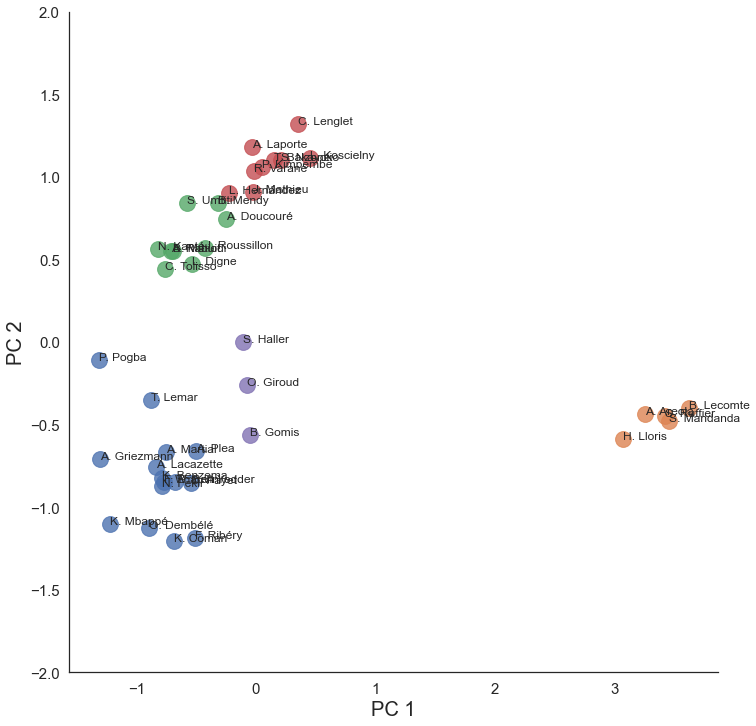

In [180]:
#Plotting

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()